In [190]:
import nbdHelp as ndb
import ndbDELETE as ndb2
from functools import partial

import os
import glob
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import scipy.ndimage
from scipy.spatial import Voronoi, voronoi_plot_2d

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

import math
from collections import defaultdict
import numpy as np

import io
import base64
from IPython.display import HTML, display
import matplotlib.pyplot as plt

from PIL import Image
from scipy.ndimage import gaussian_filter

rc('animation', html='jshtml')


In [191]:
in_path = '/Users/ameyavelankar/Library/CloudStorage/OneDrive-UW/Writing/NFLBIGDATA/data/processed/df_in.parquet'
out_path = '/Users/ameyavelankar/Library/CloudStorage/OneDrive-UW/Writing/NFLBIGDATA/data/processed/df_out.parquet'
sup_path = '/Users/ameyavelankar/Library/CloudStorage/OneDrive-UW/Writing/NFLBIGDATA/data/processed/sup_file.parquet'

df_in = pd.read_parquet(in_path)
df_out = pd.read_parquet(out_path)
sup_file = pd.read_parquet(sup_path)
map_file= pd.read_parquet('/Users/ameyavelankar/Library/CloudStorage/OneDrive-UW/Writing/NFLBIGDATA/data/processed/mapping_df.parquet')

print('Loaded df_in:', df_in.shape)
print('Loaded df_out:', df_out.shape)
print('Loaded sup_file:', sup_file.shape)
print('Loaded map_file:', map_file.shape)

Loaded df_in: (4880579, 24)
Loaded df_out: (562936, 7)
Loaded sup_file: (18009, 42)
Loaded map_file: (14108, 5)


In [192]:
print(df_in.columns.tolist())
print(df_out.columns.tolist())
print(sup_file.columns.tolist())

['game_id', 'play_id', 'player_to_predict', 'nfl_id', 'frame_id', 'play_direction', 'absolute_yardline_number', 'player_name', 'player_height', 'player_weight', 'player_birth_date', 'player_position', 'player_side', 'player_role', 'x', 'y', 's', 'a', 'dir', 'o', 'num_frames_output', 'ball_land_x', 'ball_land_y', 'flat_play_id']
['game_id', 'play_id', 'nfl_id', 'frame_id', 'x', 'y', 'flat_play_id']
['game_id', 'season', 'week', 'game_date', 'game_time_eastern', 'home_team_abbr', 'visitor_team_abbr', 'play_id', 'play_description', 'quarter', 'game_clock', 'down', 'yards_to_go', 'possession_team', 'defensive_team', 'yardline_side', 'yardline_number', 'pre_snap_home_score', 'pre_snap_visitor_score', 'play_nullified_by_penalty', 'pass_result', 'pass_length', 'offense_formation', 'receiver_alignment', 'route_of_targeted_receiver', 'play_action', 'dropback_type', 'dropback_distance', 'pass_location_type', 'defenders_in_the_box', 'team_coverage_man_zone', 'team_coverage_type', 'penalty_yards',

In [193]:
# Merge df_out with df_in to get player_role for each row
df_out_merged = df_out.merge(df_in[['game_id', 'play_id', 'nfl_id', 'frame_id', 'player_role','ball_land_x', 'ball_land_y']],
                      on=['game_id', 'play_id', 'nfl_id', 'frame_id'],
                      how='left')

In [194]:

def get_avg(id, path=path, window_size=window_size):
    #Get CSD for a given id

    CSD = Image.open(f"{path}{id}.png").convert('L')
    CSD_array = np.array(CSD)
    print(CSD_array.shape)

    # scale pixels so 0 -> 0 and 255 -> 1
    CSD_array = CSD_array.astype(float) / 255.0

    sigma = 1
    CSD_array = gaussian_filter(CSD_array.astype(float), sigma=sigma)
    CSD_array = np.clip(CSD_array, 0, 255)

    #Take the average around the center with window size

    center_x, center_y = CSD_array.shape[1] // 2, CSD_array.shape[0] // 2
    window = CSD_array[center_y - window_size//2 : center_y + window_size//2,
                       center_x - window_size//2 : center_x + window_size//2]
    average = np.mean(window)
    max=np.max(CSD_array)
    min=np.min(CSD_array)




    return average, max, min

In [195]:
get_avg(1000)

(61, 61)


(0.35206108361078847, 0.5198151522018851, 0.15187906523928563)

(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(61, 61)
(

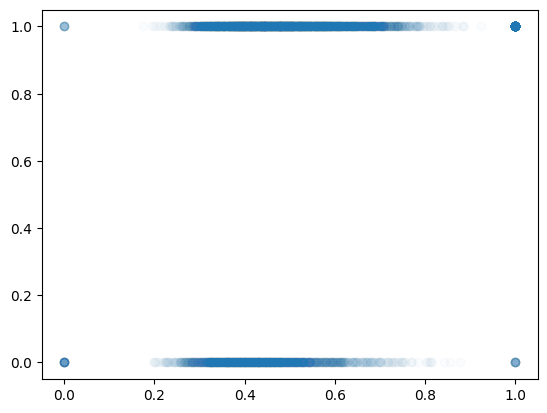

In [196]:
range = np.arange(0,6391,1)
window_size = 4
path = '/Users/ameyavelankar/Library/CloudStorage/OneDrive-UW/Writing/NFLBIGDATA/data/processed/CSD_database_2/_'
avg_values = [get_avg(id, path=path, window_size=window_size)[0] for id in range]

pass_map = sup_file.drop_duplicates('flat_play_id').set_index('flat_play_id')['pass_result'].to_dict()
pass_results = [pass_map.get(int(fid), None) for fid in range]
arr = np.array(pass_results)
# Convert arr to numeric: 1 if 'C', otherwise 0
arr = np.where(arr == 'C', 1, 0).astype(int)

# get one ball location per flat_play_id (first occurrence), then align to `range`
ball_loc_df = df_out_merged.drop_duplicates('flat_play_id').set_index('flat_play_id')[['ball_land_x','ball_land_y']]
ball_loc_re = ball_loc_df.reindex(range)  # missing ids become NaN

ball_x = ball_loc_re['ball_land_x'].to_numpy()
ball_y = ball_loc_re['ball_land_y'].to_numpy()

# find final x,y of the "Targeted Receiver" (row with max frame_id per flat_play_id) and align to `range`
tr = df_out_merged[df_out_merged['player_role'] == 'Targeted Receiver']
if not tr.empty:
    idx = tr.groupby('flat_play_id')['frame_id'].idxmax()
    tr_final = tr.loc[idx].set_index('flat_play_id')[['x', 'y']]
else:
    tr_final = pd.DataFrame(columns=['x','y'])

tr_final_re = tr_final.reindex(range)  # missing ids become NaN
targ_x = tr_final_re['x'].to_numpy()
targ_y = tr_final_re['y'].to_numpy()

# convenience structures
target_locations = np.column_stack((targ_x, targ_y))
target_locations_df = pd.DataFrame({'flat_play_id': range, 'target_x': targ_x, 'target_y': targ_y})


df_summary = pd.DataFrame({
    'flatplayid': range,
    'arr': arr,
    'balllocx': ball_x,
    'balllocy': ball_y,
    'targx': targ_x,
    'targy': targ_y,
    'avg_value': avg_values
})

df_summary.head()

plt.scatter(df_summary['avg_value'], df_summary['arr'], alpha=0.02)



   flatplayid  arr   balllocx  balllocy  targx  targy  avg_value  \
0           0    0  63.259998     -0.22  62.49   2.83   0.420384   
1           1    1  35.059998     21.75  35.94  20.70   0.274958   
2           2    1  44.150002     11.49  45.61   9.91   0.526958   
3           3    1  26.100000      4.12  28.74   2.36   0.413007   
4           4    1  34.889999     18.48  35.58  17.95   0.496009   

   dist_ball_targ  
0        3.145695  
1        1.370002  
2        2.151277  
3        3.172885  
4        0.870058  
Number of plays where targeted receiver is within 2 yards of ball landing: 5684


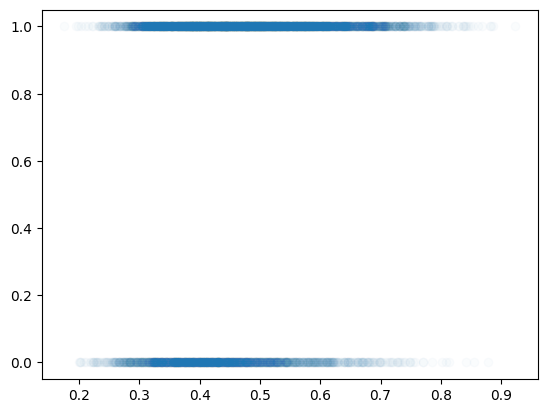

In [197]:
# compute Euclidean distance between ball landing and targeted receiver final position
df_summary['dist_ball_targ'] = np.hypot(df_summary['balllocx'] - df_summary['targx'],
                                       df_summary['balllocy'] - df_summary['targy'])

print(df_summary.head())

df_summary = df_summary[df_summary['dist_ball_targ'] <= 6].reset_index(drop=True)
# drop rows with avg_value equal to sentinel values 255 or 0
df_summary = df_summary[~df_summary['avg_value'].isin([1, 0])].reset_index(drop=True)

print(f"Number of plays where targeted receiver is within 2 yards of ball landing: {len(df_summary)}")
plt.scatter(df_summary['avg_value'], df_summary['arr'], alpha=0.02)


In [198]:
# train a logistic regression using avg_value to predict arr
X = df_summary[['avg_value']].values
y = df_summary['arr'].values

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

coef = float(model.coef_[0][0])
intercept = float(model.intercept_[0])

print(f"Logit(p) = {intercept:.6f} + {coef:.6f} * avg_value")
print(f"p(avg_value) = 1 / (1 + exp(-({intercept:.6f} + {coef:.6f} * avg_value)))")
print(f"Odds ratio per 1-unit increase in avg_value: {np.exp(coef):.6f}")

if coef != 0:
    decision_boundary = -intercept / coef
    print(f"Decision boundary (p=0.5) at avg_value = {decision_boundary:.4f}")
else:
    print("Coefficient is zero; no decision boundary.")



# attach predictions back to df_summary
df_summary = df_summary.copy()
df_summary['pred_proba'] = model.predict_proba(df_summary[['avg_value']].values)[:, 1]
df_summary['pred'] = (df_summary['pred_proba'] >= 0.5).astype(int)

Accuracy: 0.702726473175022
ROC AUC: 0.6368366669126874
Confusion matrix:
 [[  2 338]
 [  0 797]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.01      0.01       340
           1       0.70      1.00      0.83       797

    accuracy                           0.70      1137
   macro avg       0.85      0.50      0.42      1137
weighted avg       0.79      0.70      0.58      1137

Logit(p) = -0.687262 + 3.304681 * avg_value
p(avg_value) = 1 / (1 + exp(-(-0.687262 + 3.304681 * avg_value)))
Odds ratio per 1-unit increase in avg_value: 27.239843
Decision boundary (p=0.5) at avg_value = 0.2080


/var/folders/y_/lhp104kx7f177lpvvd4rn5pw0000gn/T/ipykernel_41101/1887542235.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_stats = df_summary.groupby('avg_bin')['arr'].agg(


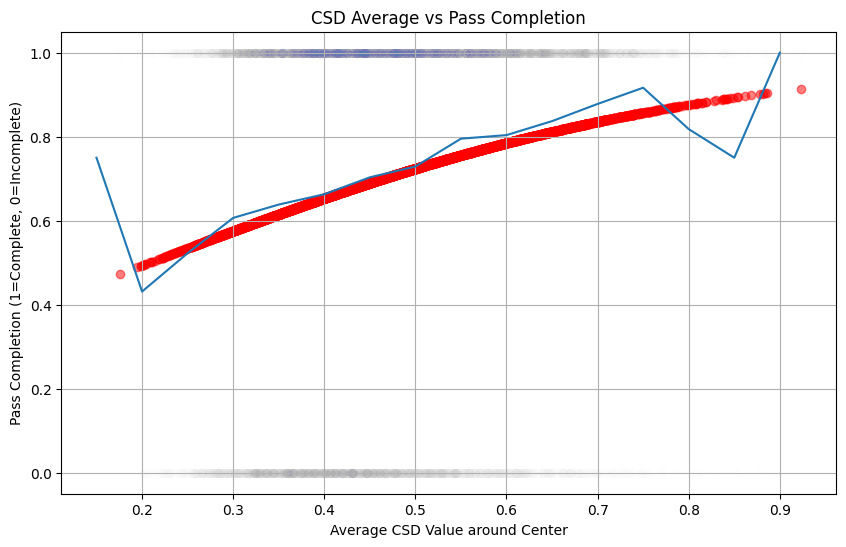

In [199]:
plt.figure(figsize=(10,6))

bin_size=0.05
bins = np.arange(0, 1 + bin_size, bin_size)
labels = [f"{b}-{b+bin_size}" for b in bins[:-1]]
df_summary['avg_bin'] = pd.cut(df_summary['avg_value'], bins=bins, labels=labels, right=False)

bin_stats = df_summary.groupby('avg_bin')['arr'].agg(
    count='count',
    pct_1=lambda x: x.mean() * 100
).reset_index()
bin_stats['pct_0'] = 100 - bin_stats['pct_1']

plt.plot(bins[0:-1],bin_stats['pct_1']/100)

plt.scatter(df_summary['avg_value'], df_summary['arr'], alpha=0.005)
plt.scatter(df_summary['avg_value'], df_summary['pred_proba'], color='red', alpha=0.5)
plt.xlabel('Average CSD Value around Center')
plt.ylabel('Pass Completion (1=Complete, 0=Incomplete)')
plt.title('CSD Average vs Pass Completion')
plt.grid()